In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pylab as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.ensemble import VotingRegressor

from pandas_datareader import data
import math
import pandas_datareader as web
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# Loading the dataset
data_source = 'yahoo'
symbol='RELIANCE.NS'
def load_data(data_source,symbol):
    if data_source=='alphavantage':
        api_key="SP3HAWW995G61TIL"
        url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(symbol,api_key)
        file_to_save='stock_market_data-%s.csv'%symbol

        if not os.path.exists(file_to_save):
            with urllib.request.urlopen(url_string) as url:
                data=json.loads(url.read().decode())
                data=data['Time Series (Daily)']
                ds=pd.dataframe(columns=['Date','Low','High','Close','Open'])
                for k,v in data.items():
                    date=dt.datetime.strptime(k,'%Y-%m-%d')
                    data_row=[date.date(),float(v['3. low']),float(v['2. high']),float(v['4. close']),float(v['1. open'])]
                    ds.loc[-1,:]=data_row
                    ds.index=ds.index+1
                print('Data saved to %s'%file_to_save)
                ds.to_csv(file_to_save)
        else:
            print('File already exists. Loading data from csv')
            ds=pd.read_csv(file_to_save)

    elif data_source=='kaggle':
        ds=pd.read_csv(os.path.join('Stocks','hpq.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])
        print('Loaded data from kaggle repository')

    else:
        #ds = web.DataReader(symbol, data_source='yahoo', start='2007-01-01', end='2020-12-24')
        ds = web.get_data_yahoo('RELIANCE.NS','01/01/2010',interval='d')
    return ds

ds=load_data(data_source,symbol)
ds=ds.sort_values('Date')
ds.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,545.549988,510.924988,545.549988,537.750000,35040012.0,457.306488
2010-01-05,574.950012,532.700012,574.950012,535.349976,9780080.0,455.265503
2010-01-06,547.250000,535.325012,539.950012,544.000000,10831076.0,462.621460
2010-01-07,557.500000,539.000000,544.000000,553.025024,11976808.0,470.296417
2010-01-08,556.900024,548.000000,554.000000,551.575012,6907852.0,469.063354


In [3]:
print("\nSample Data")
print("===========\n")
print(ds.head())
print(ds.shape)


Sample Data

                  High         Low        Open       Close      Volume  \
Date                                                                     
2010-01-04  545.549988  510.924988  545.549988  537.750000  35040012.0   
2010-01-05  574.950012  532.700012  574.950012  535.349976   9780080.0   
2010-01-06  547.250000  535.325012  539.950012  544.000000  10831076.0   
2010-01-07  557.500000  539.000000  544.000000  553.025024  11976808.0   
2010-01-08  556.900024  548.000000  554.000000  551.575012   6907852.0   

             Adj Close  
Date                    
2010-01-04  457.306488  
2010-01-05  455.265503  
2010-01-06  462.621460  
2010-01-07  470.296417  
2010-01-08  469.063354  
(2716, 6)


In [4]:
print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(ds.columns)

print("\n\nNumber of Instances in Sample Data:")
print("========================================\n")
print(ds.iloc[: ,].count())



Attributes in Sample Data:

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


Number of Instances in Sample Data:

High         2716
Low          2716
Open         2716
Close        2716
Volume       2716
Adj Close    2716
dtype: int64


In [5]:
# Dividing the dataset into input and otput

X = ds.drop("Close", axis = 1)
y = ds["Close"]

print(X.columns)

Index(['High', 'Low', 'Open', 'Volume', 'Adj Close'], dtype='object')


In [6]:
# Checking the datatypes of input and fetures

print(X.dtypes)
print(y.dtypes)

High         float64
Low          float64
Open         float64
Volume       float64
Adj Close    float64
dtype: object
float64


In [7]:
# Checking the correlation between various parameters

print(ds[["Open", "Close"]].corr(),"\n")
print(ds[["High", "Close"]].corr(),"\n")
print(ds[["Low", "Close"]].corr(),"\n")
print(ds[["Volume", "Close"]].corr())

           Open     Close
Open   1.000000  0.999421
Close  0.999421  1.000000 

           High     Close
High   1.000000  0.999769
Close  0.999769  1.000000 

            Low     Close
Low    1.000000  0.999741
Close  0.999741  1.000000 

          Volume     Close
Volume  1.000000  0.382631
Close   0.382631  1.000000


In [8]:
# Splitting of input and output data into Train and Test

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0 , shuffle = False)

In [9]:
# Training our dataset using LinearRegression as model

model_LR = LinearRegression().fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_LR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_LR.score(x_test, y_test))

pickle.dump(model_LR, open ('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_LR.pkl','wb'))




Score on training data:
0.99642


Score on testing data:
0.99973


In [10]:
y_pred_LR = model_LR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_LR)):
    expl=((actual_data[i]-y_pred_LR[i])/actual_data[i])*100.0
    print('Actual Value {:,.2f}, Predicted value {:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_LR[i], expl))



Difference between Actual value and Predicted value:
Actual Value 501.83, Predicted value 506.72 (%-0.98)
Actual Value 507.05, Predicted value 508.53 (%-0.29)
Actual Value 517.90, Predicted value 518.85 (%-0.18)
Actual Value 512.45, Predicted value 514.33 (%-0.37)
Actual Value 506.65, Predicted value 508.10 (%-0.29)
Actual Value 509.02, Predicted value 511.04 (%-0.40)
Actual Value 507.45, Predicted value 506.90 (%0.11)
Actual Value 505.92, Predicted value 507.42 (%-0.30)
Actual Value 505.23, Predicted value 504.85 (%0.07)
Actual Value 510.25, Predicted value 509.77 (%0.09)
Actual Value 506.35, Predicted value 509.45 (%-0.61)
Actual Value 513.95, Predicted value 513.03 (%0.18)
Actual Value 528.72, Predicted value 526.30 (%0.46)
Actual Value 533.20, Predicted value 530.57 (%0.49)
Actual Value 530.00, Predicted value 529.90 (%0.02)
Actual Value 514.60, Predicted value 524.66 (%-1.96)
Actual Value 506.67, Predicted value 506.27 (%0.08)
Actual Value 509.95, Predicted value 510.34 (%-0.08)

In [11]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_LR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_LR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_LR), 2)) 
print
("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_LR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_LR), 2))


Evaluation according to different parameters:

Mean absolute error = 5.09
Mean squared error = 55.43
Median absolute error = 3.4
R2 score = 1.0


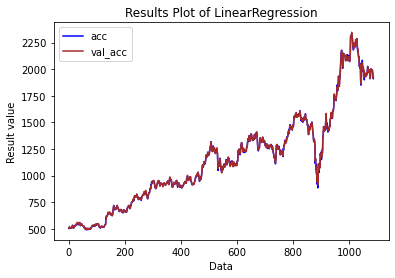

In [12]:
# Plotting the results

r = range(len(y_pred_LR))

plt.title("Results Plot of LinearRegression")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_LR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [13]:
y_pred_LR.shape

(1087,)

In [38]:
# Training our dataset using GradientBoostingRegressor as model

model_GBR = Pipeline([('scaler', StandardScaler()), ('model_GBR', GradientBoostingRegressor(random_state=0))])

model_GBR.fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_GBR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_GBR.score(x_test, y_test))

pickle.dump(model_GBR, open('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_GBR.pkl', 'wb'))



Score on training data:
0.99772


Score on testing data:
-1.69032


In [39]:
y_pred_GBR = model_GBR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_GBR)):
    expl=((actual_data[i]-y_pred_GBR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_GBR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $501.83, Predicted value $507.10 (%-1.05)
Actual Value $507.05, Predicted value $507.73 (%-0.13)
Actual Value $517.90, Predicted value $514.50 (%0.66)
Actual Value $512.45, Predicted value $514.11 (%-0.32)
Actual Value $506.65, Predicted value $507.48 (%-0.16)
Actual Value $509.02, Predicted value $510.13 (%-0.22)
Actual Value $507.45, Predicted value $506.87 (%0.11)
Actual Value $505.92, Predicted value $506.87 (%-0.19)
Actual Value $505.23, Predicted value $504.96 (%0.05)
Actual Value $510.25, Predicted value $508.83 (%0.28)
Actual Value $506.35, Predicted value $507.48 (%-0.22)
Actual Value $513.95, Predicted value $511.95 (%0.39)
Actual Value $528.72, Predicted value $522.81 (%1.12)
Actual Value $533.20, Predicted value $530.34 (%0.54)
Actual Value $530.00, Predicted value $532.44 (%-0.46)
Actual Value $514.60, Predicted value $524.57 (%-1.94)
Actual Value $506.67, Predicted value $507.92 (%-0.25)
Actual Value $509

In [40]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_GBR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_GBR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_GBR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_GBR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_GBR), 2))


Evaluation according to different parameters:

Mean absolute error = 597.86
Mean squared error = 558862.63
Median absolute error = 550.32
Explain variance score = 0.03
R2 score = -1.69


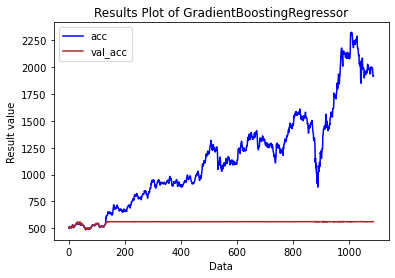

In [41]:
# Plotting the results

r = range(len(y_pred_GBR))

plt.title("Results Plot of GradientBoostingRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_GBR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [42]:
# Training our dataset using RandomForestRegressor as model

model_RFR = Pipeline([('scaler', StandardScaler()), ('model_RFR', RandomForestRegressor(random_state=0))])
model_RFR.fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_RFR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_RFR.score(x_test, y_test))

pickle.dump(model_RFR, open('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_RFR.pkl', 'wb'))



Score on training data:
0.99946


Score on testing data:
-1.68281


In [43]:
y_pred_RFR = model_RFR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_RFR)):
    expl=((actual_data[i]-y_pred_RFR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_RFR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $501.83, Predicted value $506.43 (%-0.92)
Actual Value $507.05, Predicted value $508.02 (%-0.19)
Actual Value $517.90, Predicted value $517.98 (%-0.01)
Actual Value $512.45, Predicted value $514.51 (%-0.40)
Actual Value $506.65, Predicted value $507.92 (%-0.25)
Actual Value $509.02, Predicted value $509.15 (%-0.02)
Actual Value $507.45, Predicted value $506.53 (%0.18)
Actual Value $505.92, Predicted value $506.68 (%-0.15)
Actual Value $505.23, Predicted value $504.33 (%0.18)
Actual Value $510.25, Predicted value $508.87 (%0.27)
Actual Value $506.35, Predicted value $508.51 (%-0.43)
Actual Value $513.95, Predicted value $513.49 (%0.09)
Actual Value $528.72, Predicted value $521.86 (%1.30)
Actual Value $533.20, Predicted value $531.74 (%0.27)
Actual Value $530.00, Predicted value $531.05 (%-0.20)
Actual Value $514.60, Predicted value $525.34 (%-2.09)
Actual Value $506.67, Predicted value $506.21 (%0.09)
Actual Value $509

In [44]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_RFR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_RFR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_RFR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_RFR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_RFR), 2))


Evaluation according to different parameters:

Mean absolute error = 596.72
Mean squared error = 557302.99
Median absolute error = 549.72
Explain variance score = 0.03
R2 score = -1.68


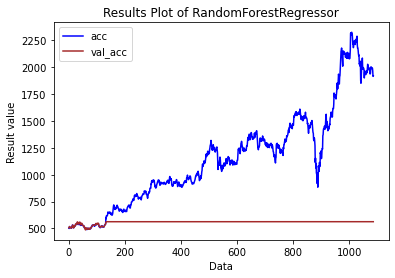

In [45]:
# Plotting the results

r = range(len(y_pred_RFR))

plt.title("Results Plot of RandomForestRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_RFR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [46]:
# Training our dataset using SupportVectorRegressor as model

model_SVR = Pipeline([('scaler', StandardScaler()), ('model_SVR', SVR())])
model_SVR.fit(x_train, y_train)
# model_SVR = SVR().fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_SVR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_SVR.score(x_test, y_test))

pickle.dump(model_SVR, open('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_SVR.pkl', 'wb'))




Score on training data:
0.96827


Score on testing data:
-2.34905


In [47]:
y_pred_SVR = model_SVR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_SVR)):
    expl=((actual_data[i]-y_pred_SVR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_SVR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $501.83, Predicted value $512.01 (%-2.03)
Actual Value $507.05, Predicted value $505.35 (%0.33)
Actual Value $517.90, Predicted value $512.77 (%0.99)
Actual Value $512.45, Predicted value $515.22 (%-0.54)
Actual Value $506.65, Predicted value $511.32 (%-0.92)
Actual Value $509.02, Predicted value $505.05 (%0.78)
Actual Value $507.45, Predicted value $504.27 (%0.63)
Actual Value $505.92, Predicted value $501.76 (%0.82)
Actual Value $505.23, Predicted value $501.46 (%0.75)
Actual Value $510.25, Predicted value $504.37 (%1.15)
Actual Value $506.35, Predicted value $511.28 (%-0.97)
Actual Value $513.95, Predicted value $507.42 (%1.27)
Actual Value $528.72, Predicted value $515.02 (%2.59)
Actual Value $533.20, Predicted value $521.40 (%2.21)
Actual Value $530.00, Predicted value $519.90 (%1.91)
Actual Value $514.60, Predicted value $489.98 (%4.78)
Actual Value $506.67, Predicted value $506.75 (%-0.01)
Actual Value $509.95, 

In [48]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_SVR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_SVR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_SVR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_SVR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_SVR), 2))


Evaluation according to different parameters:

Mean absolute error = 692.32
Mean squared error = 695702.18
Median absolute error = 657.37
Explain variance score = -0.04
R2 score = -2.35


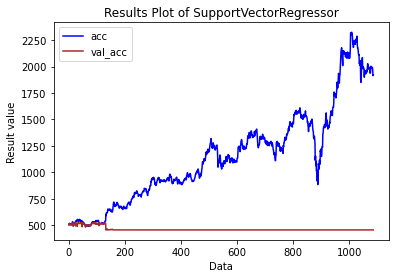

In [49]:
# Plotting the results

r = range(len(y_pred_SVR))

plt.title("Results Plot of SupportVectorRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_SVR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [50]:
# Training our dataset using KernalRidgeRegressor as model

model_KRR = KernelRidge(alpha=1.0).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_KRR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_KRR.score(x_test, y_test))

pickle.dump(model_KRR, open('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_KRR.pkl', 'wb'))

C:\Users\amolk\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "




Score on training data:
0.99640


Score on testing data:
0.99969


In [51]:
y_pred_KRR = model_KRR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_KRR)):
    expl=((actual_data[i]-y_pred_KRR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_KRR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $501.83, Predicted value $506.76 (%-0.98)
Actual Value $507.05, Predicted value $508.62 (%-0.31)
Actual Value $517.90, Predicted value $518.97 (%-0.21)
Actual Value $512.45, Predicted value $514.43 (%-0.39)
Actual Value $506.65, Predicted value $508.15 (%-0.30)
Actual Value $509.02, Predicted value $511.19 (%-0.43)
Actual Value $507.45, Predicted value $507.04 (%0.08)
Actual Value $505.92, Predicted value $507.57 (%-0.32)
Actual Value $505.23, Predicted value $504.99 (%0.05)
Actual Value $510.25, Predicted value $509.92 (%0.06)
Actual Value $506.35, Predicted value $509.54 (%-0.63)
Actual Value $513.95, Predicted value $513.20 (%0.15)
Actual Value $528.72, Predicted value $526.43 (%0.43)
Actual Value $533.20, Predicted value $530.65 (%0.48)
Actual Value $530.00, Predicted value $529.94 (%0.01)
Actual Value $514.60, Predicted value $524.48 (%-1.92)
Actual Value $506.67, Predicted value $506.14 (%0.11)
Actual Value $509.

In [52]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_KRR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_KRR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_KRR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_KRR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_KRR), 2))


Evaluation according to different parameters:

Mean absolute error = 5.54
Mean squared error = 64.64
Median absolute error = 3.66
Explain variance score = 1.0
R2 score = 1.0


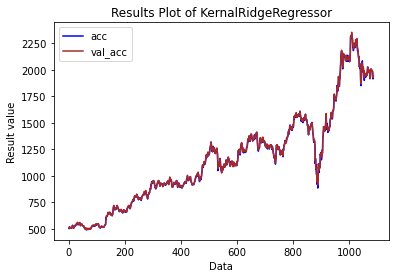

In [53]:
# Plotting the results

r = range(len(y_pred_KRR))

plt.title("Results Plot of KernalRidgeRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_KRR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [54]:
# Training our dataset using BayesianRidgeRegressor as model

model_BRR = BayesianRidge().fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_BRR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_BRR.score(x_test, y_test))

pickle.dump(model_BRR, open('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_BRR.pkl', 'wb'))




Score on training data:
0.99642


Score on testing data:
0.99973


In [55]:
y_pred_BRR = model_BRR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_BRR)):
    expl=((actual_data[i]-y_pred_BRR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_BRR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $501.83, Predicted value $506.73 (%-0.98)
Actual Value $507.05, Predicted value $508.52 (%-0.29)
Actual Value $517.90, Predicted value $518.84 (%-0.18)
Actual Value $512.45, Predicted value $514.34 (%-0.37)
Actual Value $506.65, Predicted value $508.10 (%-0.29)
Actual Value $509.02, Predicted value $511.04 (%-0.40)
Actual Value $507.45, Predicted value $506.91 (%0.11)
Actual Value $505.92, Predicted value $507.42 (%-0.30)
Actual Value $505.23, Predicted value $504.86 (%0.07)
Actual Value $510.25, Predicted value $509.77 (%0.09)
Actual Value $506.35, Predicted value $509.46 (%-0.61)
Actual Value $513.95, Predicted value $513.03 (%0.18)
Actual Value $528.72, Predicted value $526.29 (%0.46)
Actual Value $533.20, Predicted value $530.57 (%0.49)
Actual Value $530.00, Predicted value $529.91 (%0.02)
Actual Value $514.60, Predicted value $524.67 (%-1.96)
Actual Value $506.67, Predicted value $506.28 (%0.08)
Actual Value $509.

In [56]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_BRR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_BRR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_BRR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_BRR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_BRR), 2))


Evaluation according to different parameters:

Mean absolute error = 5.09
Mean squared error = 55.37
Median absolute error = 3.41
Explain variance score = 1.0
R2 score = 1.0


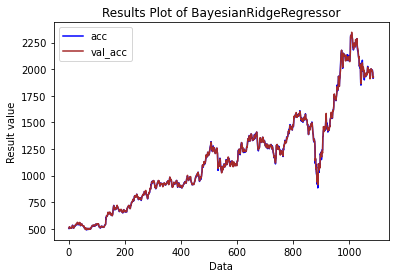

In [57]:
# Plotting the results

r = range(len(y_pred_KRR))

plt.title("Results Plot of BayesianRidgeRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_BRR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [58]:
# Training our dataset using LassoRegressor as model

model_LSS = Lasso(alpha = 0).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_LSS.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_LSS.score(x_test, y_test))

pickle.dump(model_LSS, open('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_LSS.pkl', 'wb'))



Score on training data:
0.99642


Score on testing data:
0.99973


<ipython-input-58-8892823a28ff>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_LSS = Lasso(alpha = 0).fit(x_train, y_train)
C:\Users\amolk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\amolk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7797.086416813411, tolerance: 436.09457764566133
  model = cd_fast.enet_coordinate_descent(


In [59]:
y_pred_LSS = model_LSS.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_LSS)):
    expl=((actual_data[i]-y_pred_LSS[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_LSS[i], expl))



Difference between Actual value and Predicted value:
Actual Value $501.83, Predicted value $506.71 (%-0.97)
Actual Value $507.05, Predicted value $508.53 (%-0.29)
Actual Value $517.90, Predicted value $518.85 (%-0.18)
Actual Value $512.45, Predicted value $514.33 (%-0.37)
Actual Value $506.65, Predicted value $508.09 (%-0.28)
Actual Value $509.02, Predicted value $511.04 (%-0.40)
Actual Value $507.45, Predicted value $506.90 (%0.11)
Actual Value $505.92, Predicted value $507.42 (%-0.30)
Actual Value $505.23, Predicted value $504.85 (%0.07)
Actual Value $510.25, Predicted value $509.77 (%0.09)
Actual Value $506.35, Predicted value $509.45 (%-0.61)
Actual Value $513.95, Predicted value $513.03 (%0.18)
Actual Value $528.72, Predicted value $526.30 (%0.46)
Actual Value $533.20, Predicted value $530.57 (%0.49)
Actual Value $530.00, Predicted value $529.90 (%0.02)
Actual Value $514.60, Predicted value $524.66 (%-1.95)
Actual Value $506.67, Predicted value $506.26 (%0.08)
Actual Value $509.

In [60]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_LSS), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_LSS), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_LSS), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_LSS), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_LSS), 2))


Evaluation according to different parameters:

Mean absolute error = 5.09
Mean squared error = 55.26
Median absolute error = 3.4
Explain variance score = 1.0
R2 score = 1.0


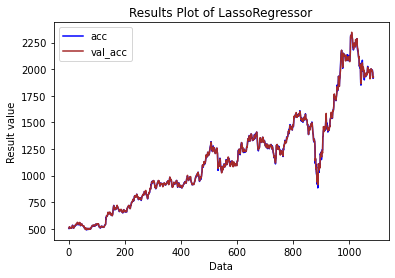

In [61]:
# Plotting the results

r = range(len(y_pred_LSS))

plt.title("Results Plot of LassoRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_LSS, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [62]:
# Training our dataset using DecisionTreeRegressor as model

model_DTR = DecisionTreeRegressor(random_state = 10).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_DTR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_DTR.score(x_test, y_test))

pickle.dump(model_DTR, open('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_DTR.pkl', 'wb'))




Score on training data:
1.00000


Score on testing data:
-1.67242


In [63]:
y_pred_DTR = model_DTR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_DTR)):
    expl=((actual_data[i]-y_pred_DTR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_DTR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $501.83, Predicted value $503.12 (%-0.26)
Actual Value $507.05, Predicted value $503.23 (%0.75)
Actual Value $517.90, Predicted value $525.20 (%-1.41)
Actual Value $512.45, Predicted value $521.80 (%-1.82)
Actual Value $506.65, Predicted value $505.95 (%0.14)
Actual Value $509.02, Predicted value $507.80 (%0.24)
Actual Value $507.45, Predicted value $504.00 (%0.68)
Actual Value $505.92, Predicted value $508.23 (%-0.45)
Actual Value $505.23, Predicted value $505.20 (%0.00)
Actual Value $510.25, Predicted value $507.80 (%0.48)
Actual Value $506.35, Predicted value $506.55 (%-0.04)
Actual Value $513.95, Predicted value $512.95 (%0.19)
Actual Value $528.72, Predicted value $523.92 (%0.91)
Actual Value $533.20, Predicted value $533.03 (%0.03)
Actual Value $530.00, Predicted value $530.83 (%-0.16)
Actual Value $514.60, Predicted value $539.70 (%-4.88)
Actual Value $506.67, Predicted value $503.12 (%0.70)
Actual Value $509.95

In [64]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_DTR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_DTR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_DTR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_DTR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_DTR), 2))


Evaluation according to different parameters:

Mean absolute error = 595.23
Mean squared error = 555144.54
Median absolute error = 548.05
Explain variance score = 0.03
R2 score = -1.67


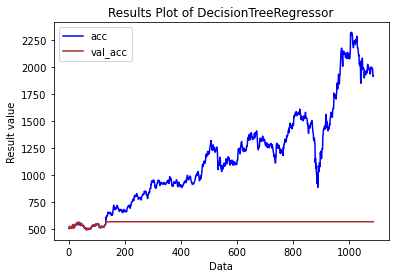

In [65]:
# Plotting the results

r = range(len(y_pred_DTR))

plt.title("Results Plot of DecisionTreeRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_DTR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [66]:
# Training our dataset using MultiLayeredPerceptronRegressor as model

model_MLP = MLPRegressor(random_state=0, max_iter=100).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_MLP.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_MLP.score(x_test, y_test))

pickle.dump(model_MLP, open('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_MLP.pkl', 'wb'))



Score on training data:
-4464.09417


Score on testing data:
-118.54506


In [67]:
y_pred_MLP = model_MLP.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_MLP)):
    expl=((actual_data[i]-y_pred_MLP[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_MLP[i], expl))



Difference between Actual value and Predicted value:
Actual Value $501.83, Predicted value $2,804.24 (%-458.81)
Actual Value $507.05, Predicted value $2,944.70 (%-480.75)
Actual Value $517.90, Predicted value $3,386.27 (%-553.85)
Actual Value $512.45, Predicted value $2,785.88 (%-443.64)
Actual Value $506.65, Predicted value $3,207.48 (%-533.08)
Actual Value $509.02, Predicted value $1,660.73 (%-226.26)
Actual Value $507.45, Predicted value $1,746.74 (%-244.22)
Actual Value $505.92, Predicted value $1,447.56 (%-186.12)
Actual Value $505.23, Predicted value $1,574.50 (%-211.64)
Actual Value $510.25, Predicted value $1,855.41 (%-263.63)
Actual Value $506.35, Predicted value $3,102.06 (%-512.63)
Actual Value $513.95, Predicted value $2,040.58 (%-297.04)
Actual Value $528.72, Predicted value $3,355.30 (%-534.60)
Actual Value $533.20, Predicted value $3,749.74 (%-603.25)
Actual Value $530.00, Predicted value $4,773.83 (%-800.72)
Actual Value $514.60, Predicted value $8,633.07 (%-1,577.63)

In [68]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_MLP), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_MLP), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_MLP), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_MLP), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_MLP), 2))


Evaluation according to different parameters:

Mean absolute error = 3707.71
Mean squared error = 24833221.78
Median absolute error = 2645.57
Explain variance score = -52.39
R2 score = -118.55


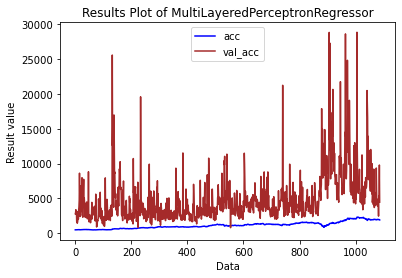

In [69]:
# Plotting the results

r = range(len(y_pred_DTR))

plt.title("Results Plot of MultiLayeredPerceptronRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_MLP, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [70]:
# Training our dataset using VotingRegressor as model

model_VR = VotingRegressor(estimators=[('ml', model_LR), ('msv', model_SVR)])
model_VR.fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_VR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_VR.score(x_test, y_test))

pickle.dump(model_VR, open('D:\\Stock\\stockClosingPricePrediction-app-main\\models\\model_VR.pkl', 'wb'))



Score on training data:
0.98967


Score on testing data:
0.16305


In [71]:
y_pred_VR = model_MLP.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_VR)):
    expl=((actual_data[i]-y_pred_VR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_VR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $501.83, Predicted value $2,804.24 (%-458.81)
Actual Value $507.05, Predicted value $2,944.70 (%-480.75)
Actual Value $517.90, Predicted value $3,386.27 (%-553.85)
Actual Value $512.45, Predicted value $2,785.88 (%-443.64)
Actual Value $506.65, Predicted value $3,207.48 (%-533.08)
Actual Value $509.02, Predicted value $1,660.73 (%-226.26)
Actual Value $507.45, Predicted value $1,746.74 (%-244.22)
Actual Value $505.92, Predicted value $1,447.56 (%-186.12)
Actual Value $505.23, Predicted value $1,574.50 (%-211.64)
Actual Value $510.25, Predicted value $1,855.41 (%-263.63)
Actual Value $506.35, Predicted value $3,102.06 (%-512.63)
Actual Value $513.95, Predicted value $2,040.58 (%-297.04)
Actual Value $528.72, Predicted value $3,355.30 (%-534.60)
Actual Value $533.20, Predicted value $3,749.74 (%-603.25)
Actual Value $530.00, Predicted value $4,773.83 (%-800.72)
Actual Value $514.60, Predicted value $8,633.07 (%-1,577.63)

In [72]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_VR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_VR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_VR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_VR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_VR), 2))


Evaluation according to different parameters:

Mean absolute error = 3707.71
Mean squared error = 24833221.78
Median absolute error = 2645.57
Explain variance score = -52.39
R2 score = -118.55


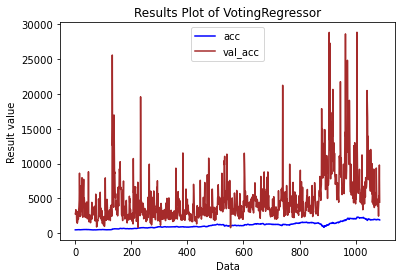

In [73]:
# Plotting the results

r = range(len(y_pred_DTR))

plt.title("Results Plot of VotingRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_VR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()